<font color='red'> 

# We begin a new section now: Classification. In covering classification, we're going to cover two major classificiation algorithms: K Nearest Neighbors and the Support Vector Machine (SVM). While these two algorithms are both classification algorithms, they acheive results in different ways
</font>

## To get the theory of classification and KNN visit this :
https://pythonprogramming.net/k-nearest-neighbors-intro-machine-learning-tutorial/?completed=/sample-data-testing-machine-learning-tutorial/

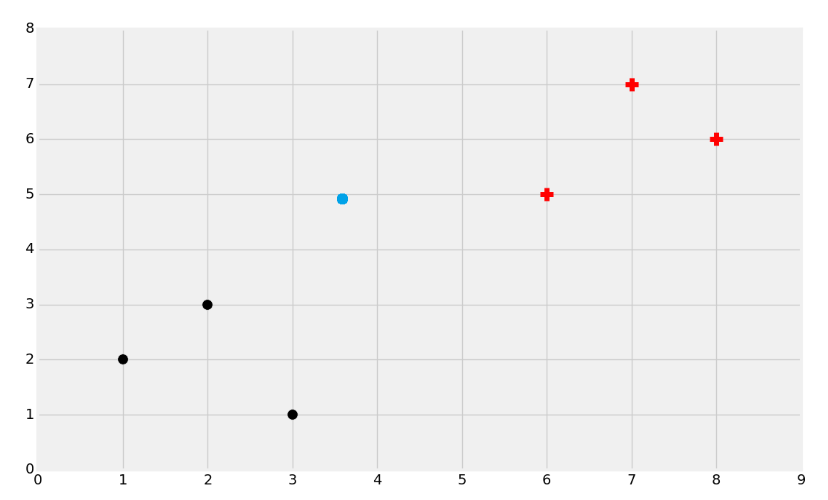

<font color='green'> 


## One more rule in this is that the K should not be equal to or less than the number of groups available

## The explanation is simple, as in K nearest we take a point and try to find the K nearest neighbours i.e. if K=3 then we would like to find the 3 nearest neighbours, let them be black,red,black (in order of distance). So as black has 66% probability we will classify the point in the black category 

## But if K=1, we would not have any reliable data( suppose the nearest is red but suppose when we do it with K=3 then it comes red,black,black. So, if we do it K=3, the answer comes as red but with K=3 it comes as black which is accurate) 

## With K=2 we might have a split vote such as red,black which would have 50%,50% probability hence we need to assure that K nearest is never equal to or less than the number of voting groups
</font>

<font color='blue'> 

## Another thing is that K should always be odd , because even K many times lead to split vote even if K is higher than the voting groups, example would be red,black,red,red,black,black where both would have 50%,50% probability.

## This would not be the case with odd as it being odd ensures that it's never evenly distributed
</font>

## To exemplify classification, we're going to use a Breast Cancer Dataset, which is a dataset donated to the University of California, Irvine (UCI) collection from the University of Wisconsin-Madison

In [1]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('breast-cancer-wisconsin.data')
df

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


## Missing/bad data: This dataset also has some missing data in it, which we're going to need to clean! Let's start off with our imports, pulling in the data, and some cleaning. After reading in the data, we take note that there are some columns with missing data. These columns have a "?" filled in. 

## In this case, we're choosing to fill in a -99,999 value for any missing data. You can choose how you want to handle missing data, but, in the real world, you may find that 50% or more of your rows contain missing data in one of the columns, especially if you are collecting data with extensive attributes. -99999 isn't perfect, but it works well enough

In [2]:
df.replace('?',-99999, inplace=True)
df.drop(columns=['id'], inplace=True)
df

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


## Now here the class is very important, if the class is 2  the cancer is 'benign'(not dangerous) and if it's 4 then it's 'malignant'(dangerous), we test our dataset accordingly with k nearest classification

In [3]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(columns=['id'], inplace=True)

X = np.array(df.drop(columns=['class']))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9785714285714285


## The accuracy is very high but let's show what happens when we do indeed include truly meaningless and misleading data by commenting out the dropping of the id column which contains values like 1000025, 897471	etc.

In [4]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
#df.drop(columns=['id'], inplace=True)

X = np.array(df.drop(columns=['class']))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.6071428571428571


## Now let us train our data with an example set created by ourselves

In [5]:
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(columns=['id'], inplace=True)

X = np.array(df.drop(columns=['class']))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

example_measures = np.array([4,2,1,1,1,2,3,2,1])
example_measures = example_measures.reshape(1, -1)
prediction = clf.predict(example_measures)
print(prediction)

0.9857142857142858
[2]


## Here if you do not reshape example_measures you will get a warning : DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.

## So we need to reshape our data to a 2d array and as our data contains a sample data and not features( what it means is that a row would have values of all unif_cell_size, unif_cell_shape, marg_adhesion etc. whereas a column would have the valuesof only a single feature, and that is not the case with this example, it has data of every column except id(jo ki hamne pehle hi hata diya tha) and class(jisko predictkarna hai))

## Look in this for why (-1,1) is used : https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape

In [6]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(2, -1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


## If we had 2 samples

In [7]:
example_measures = np.array([[4,2,1,1,1,2,3,2,1],[4,2,1,1,1,2,3,2,1]])
example_measures = example_measures.reshape(len(example_measures), -1)
prediction = clf.predict(example_measures)
print(prediction)

[2 2]


## If we had more samples for that just use len function

<font color='green'> 

## Now, we have covered how to use the K Nearest Neighbors algorithm via Scikit-Learn to achieve 95% accuracy in predicting benign vs malignant tumors based on tumor attributes. Now, we're going to dig into how K Nearest Neighbors works so we have a full understanding of the algorithm itself, to better understand when it will and wont work for us
</font>

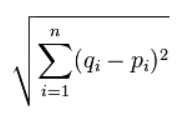

## This is the formula to cover the distances where i represents the dimensions whether they be x,y,z etc. (the same as the formula sqrt((y2-y1)^2 + (x2-x1)^2) taught in school

In [8]:
from math import sqrt
plot1 = [1,3]
plot2 = [2,5]
euclidean_distance = sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2 )

## This can be our formula for euclidean distance

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]

## The dataset is just a Python dictionary with the keys being the color of the points (think of these as the class), and then the datapoints that are attributed with this class
## The second one will be the one we will be predict whether it will go with k or r

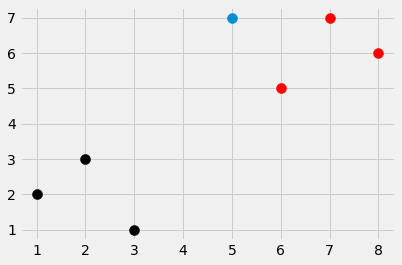

In [10]:
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)

plt.show()

## The line that is [[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset] is the same as:

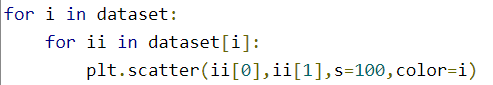

## You can see there are obvious groups of red and black, and then we have the blue dot. The blue dot is the new_features, which we're going to attempt to classify

In [11]:
def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

## There's a skeleton of what we expect to have here to start. We want a function that will take in data to train against, new data to predict with, and a value for K, which we'll just set as defaulting to 3.

## The distances would be a list of  euclidean distances i.e. the distances between the prediction point (5,7) and the points in the data (1,2) etc.

## np.linalg.norm(np.array(features)-np.array(predict)) will be equal to :
<font color='green'> 

## euclidean_distance = sqrt( (features[0]-predict[0])**2 + (features[1]-predict[1])**2 )
## euclidean_distance = np.sqrt(np.sum((np.array(features)-np.array(predict))**2))
</font>

## So basically the euclidean distances

##  votes = [i[1] for i in sorted(distances)[:k]] will sort the distances and give the index[1] i.e. the groups of the first K groups ([:K])

## vote_result = Counter(votes).most_common(1)[0][0] will help us get the answer. A Counter is a dict subclass for counting hashable objects. It is a collection where elements are stored as dictionary keys and their counts are stored as dictionary values which will be like    
## {'k' : [1] , 'r' : [2]} (an example)

## most_common(n) returns a list of the n most common elements and their counts from the most common to the least. So here most_common(1) will give (['r',3]) and in [0][0] the first [0] will slect the first list in the tuple i.e. ['r',3] (socho) and the second one will give us the first element of the list i.e. 'r'

[[6.4031242374328485, 'k'], [5.0, 'k'], [6.324555320336759, 'k'], [2.23606797749979, 'r'], [2.0, 'r'], [3.1622776601683795, 'r']]


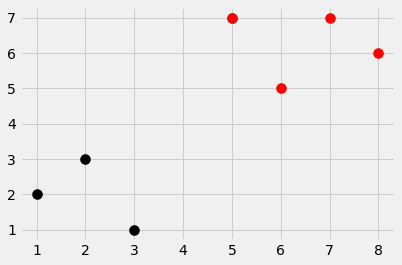

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    
    print(distances)
    
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# same as:
##for i in dataset:
##    for ii in dataset[i]:
##        plt.scatter(ii[0],ii[1],s=100,color=i)
        
plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

## Here I have printed the distances just for understanding of the previous point.

## Now we can see that the point that was blue at first is now classified with the red group.Things have worked on a small scale, but how will we do on the breast cancer dataset? How will we compare to Scikit-Learn's rendition of K Nearest Neighbors? In the next tutorial, we'll apply our algorithm to that dataset to find out!

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
#dont forget this
import pandas as pd
import random
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(columns=['id'], inplace=True)


full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]



for i in train_data:
    train_set[i[-1]].append(i[:-1])

    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)
print(2*"\n")
print(100*"#")
print(2*"\n")
print("df before <full_data = df.astype(float).values.tolist() :> \n")
print(df.iloc[20:45])
print(2*"\n")
print(100*"#")
print(2*"\n")
print("df after <full_data = df.astype(float).values.tolist() :>\n")
print(full_data[:5])
print(2*"\n")
print(100*"#")
print(2*"\n")
print("Train_data :\n")
print(train_data[:5])
print(2*"\n")
print(100*"#")
print(2*"\n")
print("Train_set :\n")
print(train_set)

Accuracy: 0.9568345323741008



####################################################################################################



df before <full_data = df.astype(float).values.tolist() :> 

    clump_thickness  unif_cell_size  unif_cell_shape  marg_adhesion  \
20                7               3                2             10   
21               10               5                5              3   
22                3               1                1              1   
23                8               4                5              1   
24                1               1                1              1   
25                5               2                3              4   
26                3               2                1              1   
27                5               1                1              1   
28                2               1                1              1   
29                1               1                3              1   
30                3   

<font color="red">

# The above results are for understanding, look at them to understand the points below 
</font>

## Here we write full_data = df.astype(float).values.tolist() as many of the data in the dataset is in strings like '1' for some or the other reason. So we convert all the data to float and return a list of lists
<font color="green">

## Important : We do not need to write full_data = random.shuffle(full_data) to shuffle full_data, even just writing random.shuffle(full_data) would shuffle it
</font>

## After shuffling the data we prepare the dictionaries for the training and testing set to be populated. Next, we specify which chunk is the train_data and which is the test_data. We do this by selecting the first 80% as train_data (by doing logic that says to slice the list up to the last 20%), and then we create the test_data by slicing the final 20% of the shuffled data

<font color="blue">
    
## Then in " for i in train_data: train_set[i[-1]].append(i[:-1]) ". What we are doing here is that first in "for i in train_data" we are selecting each list(see in the printed version of train_data) and for each list i.e "i" we do i[-1] i.e. selecting the last feature (class) which is either 2 or 4. By this we can pass the data of classes 2 or 4 in their respective dictionaries.

## Then we append the rest of the data i[:-1] to the dictionary hence creating a dictionary of classes 2 and 4 with their respective features
</font> 

## In the last section,in "for group in test_set:" the groups will be '2' and '4'

## In for "for data in test_set[group]:" , it will give the various lists of data in the '2' group first and then the '4' group. Then we will compare our classificationmodel with theScikit Learn KNeighborsClassifier model.

In [39]:
%%time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
#dont forget this
import pandas as pd
import random
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(columns=['id'], inplace=True)


full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]



for i in train_data:
    train_set[i[-1]].append(i[:-1])

    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.9856115107913669
CPU times: total: 1.08 s
Wall time: 1.1 s


In [40]:
%%time
import numpy as np
from sklearn import preprocessing, neighbors
from sklearn.model_selection import train_test_split
import pandas as pd

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(columns=['id'], inplace=True)

X = np.array(df.drop(columns=['class']))
y = np.array(df['class'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)
print(accuracy)

0.9642857142857143
CPU times: total: 46.9 ms
Wall time: 31.8 ms


## The speed, per round of the Scikit-Learn version of KNN was 0.046 seconds, vs our 1.08 seconds, per classification. Thus, while we achieved identical results, we're significantly slower than Scikit-Learn. This is due to scikit learn having a default radius under which it works and also other things in its source code

In [41]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    print(vote_result, confidence)
    return vote_result, confidence


df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(columns=['id'], inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

test_size = 0.4
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

2 1.0
2 1.0
2 1.0
4 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 0.6
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 0.8
2 1.0
2 1.0
2 1.0
2 1.0
2 0.8
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 0.6
2 1.0
2 1.0
2 0.6
2 1.0
2 1.0
2 1.0
2 1.0
4 0.8
4 0.8
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 0.6
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.0
2 1.

In [42]:
import numpy as np
from math import sqrt
import warnings
from collections import Counter
import pandas as pd
import random

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance, group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
    return vote_result, confidence


df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(columns=['id'], inplace=True)
full_data = df.astype(float).values.tolist()
random.shuffle(full_data)

test_size = 0.4
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])
    
for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote,confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        else :
            print(confidence)
        total += 1
print('Accuracy:', correct/total)

1.0
0.6
0.6
1.0
0.8
Accuracy: 0.982078853046595


<font color="blue">

## In learning algorithm, Confidence defines the probability of the event (or probability of input to fall in different classes). If a class has high probability then it has high confidence. Confidence value can be calculated for single input as well giving the meaning as how much the algorithm is confident for that class.

## On the other hand, accuracy defines the skill of the learning algorithm to predict accurately. It defines the percentage of correct predictions made from all predictions.Such as when we predict places where only 0.6 probability is there or place where 1.0 probability is there(socho)
</font>
    
## Jaise upar maan lo K=5 hai to agar paancho nearest points ek hi group se hai to confidence 1.0 hoga aur agar 4 ek group se to confidence 0.8 hoga

## Accuracy is the measure of predictability ki hamne agar sahi se predict kar diya ki yaha par confidence 0.4 ya yaha pe 0.8 hai to wo model accurate

## Upar hamare model ne sirf 5 confidences ko dhang se predict nahi kiya jiski wajah se hamari accuracy 0.982078853046595 hai

<font color="red">

# One more thing is at : https://youtu.be/r_D5TTV9-2c , from 12:00 minute onwards to 14:36, just 2 minutes of content which you could see at 2x speed
</font>